In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from scipy.stats import zscore
from scipy.stats import skew, kurtosis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


In [281]:
df = pd.read_csv('/Users/aimaldastagirzada/Downloads/new_train.csv.zip')

In [282]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [284]:
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
count,32950.000000,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950.000000,32950.000000,32950.000000,32950.000000,32950,32950
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,no
freq,NaN,8314,19953,9736,26007,17254,27131,20908,11011,6857,NaN,NaN,NaN,NaN,28416,29238
mean,40.014112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.127466,2.560607,962.052413,0.174719,NaN,NaN
std,10.403636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.975917,2.752326,187.951096,0.499025,NaN,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.000000,1.000000,999.000000,0.000000,NaN,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,NaN


In [285]:
df[df['age'].isnull() & df['default'].isnull() & df['loan'].isnull()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y


In [286]:
df['job'].unique()

array(['blue-collar', 'entrepreneur', 'retired', 'admin.', 'student',
       'services', 'technician', 'self-employed', 'management',
       'unemployed', 'unknown', 'housemaid'], dtype=object)

In [287]:
mode_job = 'admin.'

# Using str.replace() to replace substrings with the known mode value
df['job'] = df['job'].str.replace('unknown', mode_job)

print(df)

       age           job   marital            education  default housing loan   
0       49   blue-collar   married             basic.9y  unknown      no   no  \
1       37  entrepreneur   married    university.degree       no      no   no   
2       78       retired   married             basic.4y       no      no   no   
3       36        admin.   married    university.degree       no     yes   no   
4       59       retired  divorced    university.degree       no      no   no   
...    ...           ...       ...                  ...      ...     ...  ...   
32945   28      services    single          high.school       no     yes   no   
32946   52    technician   married  professional.course       no     yes   no   
32947   54        admin.   married             basic.9y       no      no  yes   
32948   29        admin.   married    university.degree       no      no   no   
32949   35        admin.   married    university.degree       no      no  yes   

         contact month day_

In [288]:
df['marital'].unique()

array(['married', 'divorced', 'single', 'unknown'], dtype=object)

In [289]:
mode_mar = 'married'

# Using str.replace() to replace substrings with the known mode value
df['marital'] = df['marital'].str.replace('unknown', mode_mar)

print(df)

       age           job   marital            education  default housing loan   
0       49   blue-collar   married             basic.9y  unknown      no   no  \
1       37  entrepreneur   married    university.degree       no      no   no   
2       78       retired   married             basic.4y       no      no   no   
3       36        admin.   married    university.degree       no     yes   no   
4       59       retired  divorced    university.degree       no      no   no   
...    ...           ...       ...                  ...      ...     ...  ...   
32945   28      services    single          high.school       no     yes   no   
32946   52    technician   married  professional.course       no     yes   no   
32947   54        admin.   married             basic.9y       no      no  yes   
32948   29        admin.   married    university.degree       no      no   no   
32949   35        admin.   married    university.degree       no      no  yes   

         contact month day_

In [290]:
df['education'].unique()

array(['basic.9y', 'university.degree', 'basic.4y', 'high.school',
       'professional.course', 'unknown', 'basic.6y', 'illiterate'],
      dtype=object)

In [291]:
mode_edu = 'university.degree'

# Using str.replace() to replace substrings with the known mode value
df['education'] = df['education'].str.replace('unknown', mode_edu)

print(df)

       age           job   marital            education  default housing loan   
0       49   blue-collar   married             basic.9y  unknown      no   no  \
1       37  entrepreneur   married    university.degree       no      no   no   
2       78       retired   married             basic.4y       no      no   no   
3       36        admin.   married    university.degree       no     yes   no   
4       59       retired  divorced    university.degree       no      no   no   
...    ...           ...       ...                  ...      ...     ...  ...   
32945   28      services    single          high.school       no     yes   no   
32946   52    technician   married  professional.course       no     yes   no   
32947   54        admin.   married             basic.9y       no      no  yes   
32948   29        admin.   married    university.degree       no      no   no   
32949   35        admin.   married    university.degree       no      no  yes   

         contact month day_

In [292]:
df['education'].unique()

array(['basic.9y', 'university.degree', 'basic.4y', 'high.school',
       'professional.course', 'basic.6y', 'illiterate'], dtype=object)

In [293]:
df['default'].unique()





array(['unknown', 'no', 'yes'], dtype=object)

In [294]:
df['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [295]:

df['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [296]:
mode_def= 'no'

# Using str.replace() to replace substrings with the known mode value
df['default'] = df['default'].str.replace('unknown', mode_def)

print(df)

       age           job   marital            education default housing loan   
0       49   blue-collar   married             basic.9y      no      no   no  \
1       37  entrepreneur   married    university.degree      no      no   no   
2       78       retired   married             basic.4y      no      no   no   
3       36        admin.   married    university.degree      no     yes   no   
4       59       retired  divorced    university.degree      no      no   no   
...    ...           ...       ...                  ...     ...     ...  ...   
32945   28      services    single          high.school      no     yes   no   
32946   52    technician   married  professional.course      no     yes   no   
32947   54        admin.   married             basic.9y      no      no  yes   
32948   29        admin.   married    university.degree      no      no   no   
32949   35        admin.   married    university.degree      no      no  yes   

         contact month day_of_week  dur

In [297]:
mode_loan= 'no'

# Using str.replace() to replace substrings with the known mode value
df['loan'] = df['loan'].str.replace('unknown', mode_loan)

print(df)

       age           job   marital            education default housing loan   
0       49   blue-collar   married             basic.9y      no      no   no  \
1       37  entrepreneur   married    university.degree      no      no   no   
2       78       retired   married             basic.4y      no      no   no   
3       36        admin.   married    university.degree      no     yes   no   
4       59       retired  divorced    university.degree      no      no   no   
...    ...           ...       ...                  ...     ...     ...  ...   
32945   28      services    single          high.school      no     yes   no   
32946   52    technician   married  professional.course      no     yes   no   
32947   54        admin.   married             basic.9y      no      no  yes   
32948   29        admin.   married    university.degree      no      no   no   
32949   35        admin.   married    university.degree      no      no  yes   

         contact month day_of_week  dur

In [298]:
mode_house= 'yes'

# Using str.replace() to replace substrings with the known mode value
df['housing'] = df['housing'].str.replace('unknown', mode_house)

print(df)

       age           job   marital            education default housing loan   
0       49   blue-collar   married             basic.9y      no      no   no  \
1       37  entrepreneur   married    university.degree      no      no   no   
2       78       retired   married             basic.4y      no      no   no   
3       36        admin.   married    university.degree      no     yes   no   
4       59       retired  divorced    university.degree      no      no   no   
...    ...           ...       ...                  ...     ...     ...  ...   
32945   28      services    single          high.school      no     yes   no   
32946   52    technician   married  professional.course      no     yes   no   
32947   54        admin.   married             basic.9y      no      no  yes   
32948   29        admin.   married    university.degree      no      no   no   
32949   35        admin.   married    university.degree      no      no  yes   

         contact month day_of_week  dur

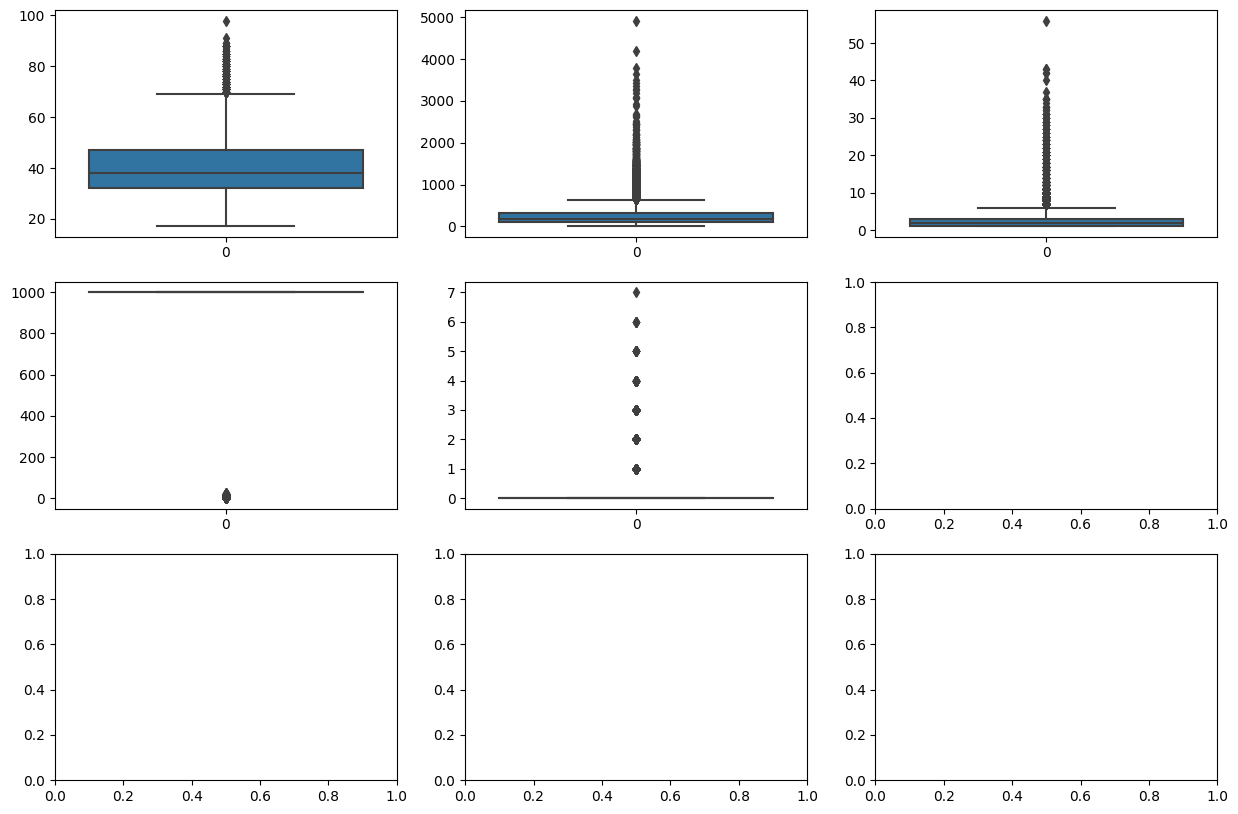

In [299]:
fig, axs = plt.subplots(3,3, figsize = (15,10))
plt1 = sns.boxplot(df['age'], ax = axs[0,0])
plt2 = sns.boxplot(df['duration'], ax = axs[0,1])
plt3 = sns.boxplot(df['campaign'], ax = axs[0,2])
plt4 = sns.boxplot(df['pdays'], ax = axs[1,0])
plt5 = sns.boxplot(df['previous'], ax = axs[1,1])

In [300]:
numerical_columns= ['age', 'duration', 'campaign', 'pdays', 'previous']

In [301]:
for column in numerical_columns:
    skewness_values = []
    s = skew(df[column])
    k = kurtosis(df[column])
    print(f'{column}: skewness = {s}, kurtosis = {k}')

age: skewness = 0.7607842774312615, kurtosis = 0.671992211583099
duration: skewness = 3.326460158442591, kurtosis = 21.44781353206567
campaign: skewness = 4.742320995656816, kurtosis = 36.96480844195268
pdays: skewness = -4.890387819960462, kurtosis = 21.9163315719817
previous: skewness = 3.8545487961523786, kurtosis = 20.478262176617537


In [302]:
if abs(s) > 1:
    df[column] = df[column].apply(lambda x: np.log(x + 1))

In [303]:
z_scores = zscore(df[numerical_columns])

In [304]:
threshold = 3

In [305]:
df = df[(np.abs(z_scores) < threshold).all(axis=1)]

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29864 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          29864 non-null  int64  
 1   job          29864 non-null  object 
 2   marital      29864 non-null  object 
 3   education    29864 non-null  object 
 4   default      29864 non-null  object 
 5   housing      29864 non-null  object 
 6   loan         29864 non-null  object 
 7   contact      29864 non-null  object 
 8   month        29864 non-null  object 
 9   day_of_week  29864 non-null  object 
 10  duration     29864 non-null  int64  
 11  campaign     29864 non-null  int64  
 12  pdays        29864 non-null  int64  
 13  previous     29864 non-null  float64
 14  poutcome     29864 non-null  object 
 15  y            29864 non-null  object 
dtypes: float64(1), int64(4), object(11)
memory usage: 3.9+ MB


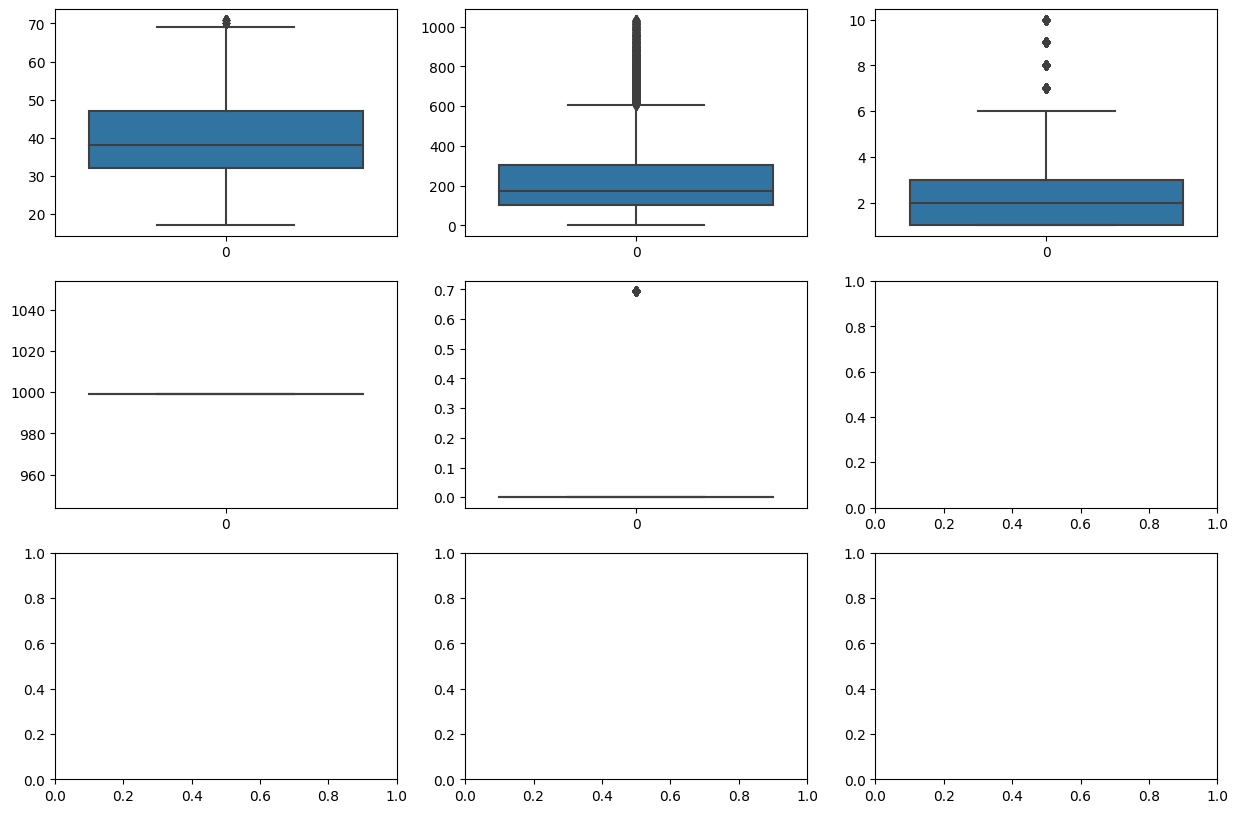

In [307]:
fig, axs = plt.subplots(3,3, figsize = (15,10))
plt1 = sns.boxplot(df['age'], ax = axs[0,0])
plt2 = sns.boxplot(df['duration'], ax = axs[0,1])
plt3 = sns.boxplot(df['campaign'], ax = axs[0,2])
plt4 = sns.boxplot(df['pdays'], ax = axs[1,0])
plt5 = sns.boxplot(df['previous'], ax = axs[1,1])

<Axes: xlabel='previous', ylabel='Count'>

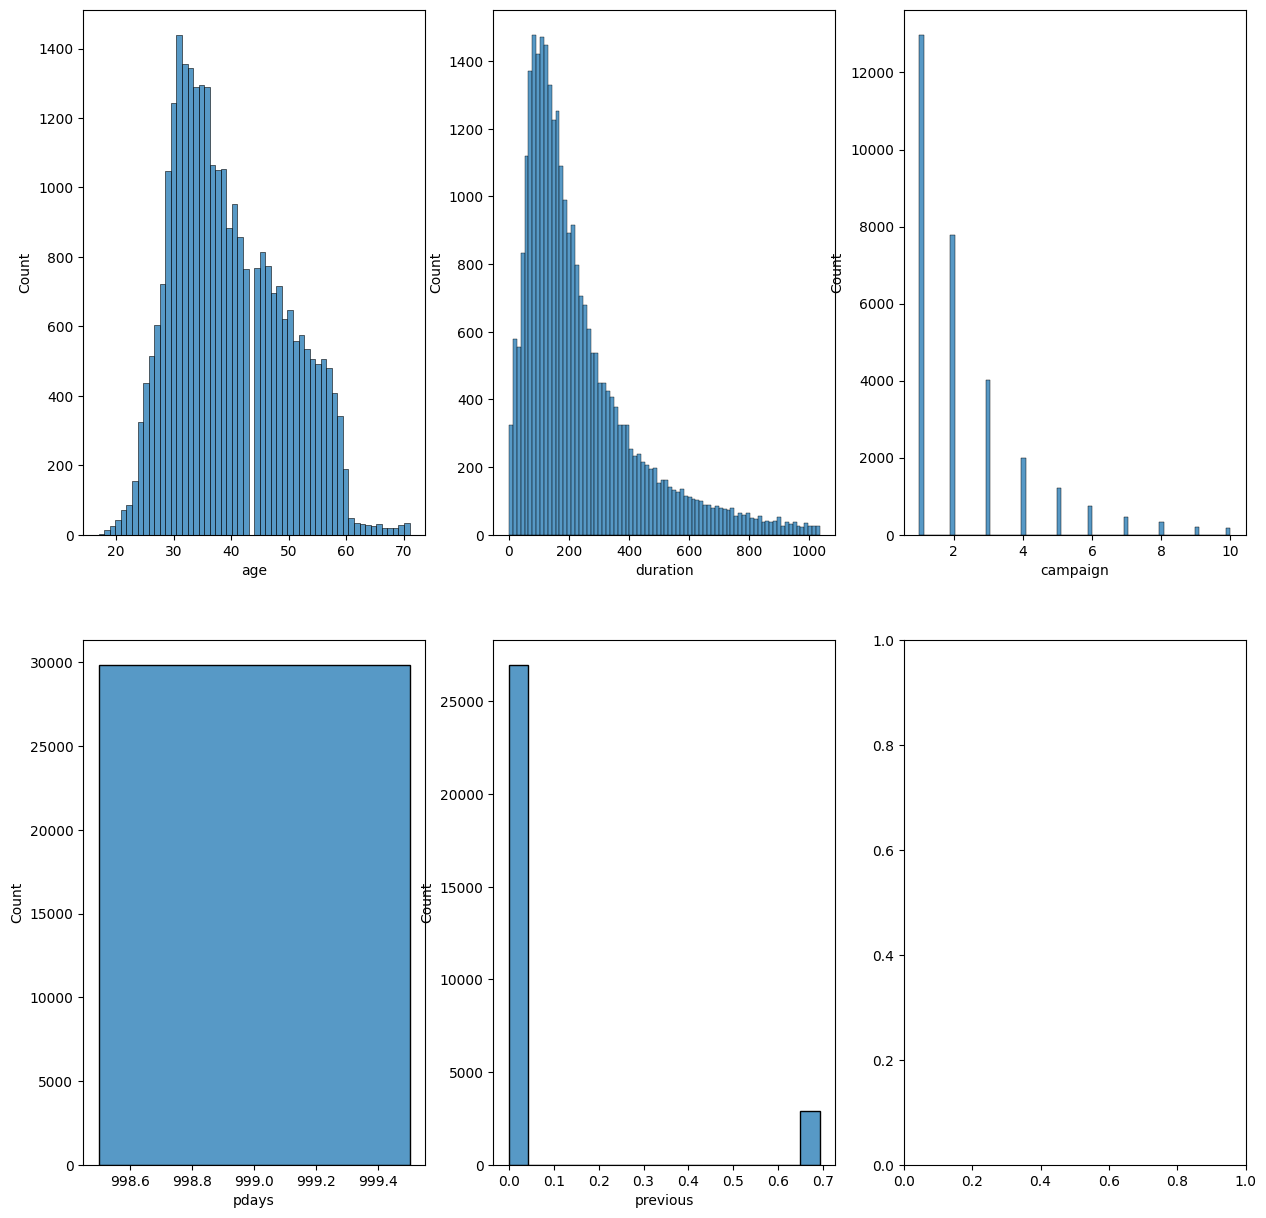

In [308]:
fig, axs = plt.subplots(2,3, figsize=(15,15))

sns.histplot(df['age'], ax =axs[0][0])
sns.histplot(df['duration'], ax=axs[0][1])
sns.histplot(df['campaign'], ax=axs[0][2])
sns.histplot(df['pdays'],ax =axs[1][0])
sns.histplot(df['previous'],ax=axs[1][1])

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29864 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          29864 non-null  int64  
 1   job          29864 non-null  object 
 2   marital      29864 non-null  object 
 3   education    29864 non-null  object 
 4   default      29864 non-null  object 
 5   housing      29864 non-null  object 
 6   loan         29864 non-null  object 
 7   contact      29864 non-null  object 
 8   month        29864 non-null  object 
 9   day_of_week  29864 non-null  object 
 10  duration     29864 non-null  int64  
 11  campaign     29864 non-null  int64  
 12  pdays        29864 non-null  int64  
 13  previous     29864 non-null  float64
 14  poutcome     29864 non-null  object 
 15  y            29864 non-null  object 
dtypes: float64(1), int64(4), object(11)
memory usage: 4.9+ MB


In [310]:
df.groupby(['education', 'y'])['age'].count().unstack()


y,no,yes
education,,
basic.4y,2749,183
basic.6y,1636,99
basic.9y,4236,251
high.school,6363,561
illiterate,12,3
professional.course,3516,305
university.degree,8961,989


In [311]:
df.groupby(['age', 'y'])['age'].count().unstack()

y,no,yes
age,,
17,NaN,1.0
18,11.0,2.0
19,14.0,12.0
20,31.0,11.0
21,54.0,18.0
22,69.0,16.0
23,132.0,22.0
24,282.0,42.0
25,374.0,63.0


In [312]:
df.groupby(['marital', 'y'])['age'].count().unstack()


y,no,yes
marital,,
divorced,3115,224
married,16952,1294
single,7406,873


In [313]:
df.groupby(['default', 'y'])['age'].count().unstack()

y,no,yes
default,,
no,27470.0,2391.0
yes,3.0,NaN


In [314]:
df.groupby(['housing', 'y'])['age'].count().unstack()

y,no,yes
housing,,
no,12472,1048
yes,15001,1343


In [315]:
df.groupby(['loan', 'y'])['age'].count().unstack()

y,no,yes
loan,,
no,23275,2034
yes,4198,357


###All of these can be strong predictors


In [316]:
# edu = pd.get_dummies(df['education'],dtype=int)
# age_dummy =pd.get_dummies(df['age'],dtype=int)
# marriage = pd.get_dummies(df['marital'],dtype=int)
# defau=pd.get_dummies(df['default'],dtype=int)
# # housed=pd.get_dummies(df['housing'],dtype=int)
# loaned = pd.get_dummies(df['loan'], dtype=int)




In [317]:
# new_df = pd.concat([df[['age','duration','']],edu,age_dummy, marriage, defau, housed,loaned,df['y']], axis=1)

In [360]:
def y_stat(x):
    if x =='no':
        return 0
    elif x =='yes':
        return 1

In [361]:
df['y']= df['y'].apply(y_stat)


/var/folders/yk/m3w26_h527n36v88wgw18khc0000gn/T/ipykernel_76827/921498394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y']= df['y'].apply(y_stat)


In [362]:
num_columns= ['age' , 'duration']
cat_columns = ['education', 'marital', 'default', 'housing', 'loan']
target ='y'

In [363]:
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_columns),
                                                 ('num', num_transformer, num_columns)])


In [364]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,no,no,no,cellular,nov,wed,227,4,999,0.000000,nonexistent,0
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,0.693147,failure,0
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0.000000,nonexistent,0
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0.000000,nonexistent,0
5,29,admin.,single,university.degree,no,no,no,cellular,aug,wed,256,2,999,0.000000,nonexistent,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0.000000,nonexistent,0
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,0.693147,failure,0
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0.000000,nonexistent,0
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0.000000,nonexistent,0


In [365]:
X_train, X_test, y_train, y_test = train_test_split(df[cat_columns + num_columns], df[target], test_size=0.2, random_state=42)


In [366]:
x_train_transformed = preprocessor.fit_transform(X_train)
x_test_transformed = preprocessor.fit_transform(X_test)

In [367]:
#
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers = [('categorical_features',cat_transformer, cat_columns),
                                                 ('numerical_features', num_transformer, num_columns)])

In [368]:
log = LogisticRegression() 
knn=KNeighborsClassifier()
nb = GaussianNB()
svc = SVC()

In [369]:
log_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', log)
])
nb_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', nb)
])
svc_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', svc)
])
knn_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', knn)
])

In [370]:
log_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical_features',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['education', 'marital',
                                                   'default', 'housing',
                                                   'loan']),
                                                 ('numerical_features',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'duration'])])),
                ('classifier', LogisticRegression())])

In [371]:
we = nb_pipeline.fit(X_train, y_train)
knn_pipeline.fit(X_train, y_train)
svc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical_features',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['education', 'marital',
                                                   'default', 'housing',
                                                   'loan']),
                                                 ('numerical_features',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'duration'])])),
                ('classifier', SVC())])

In [372]:
pred_log = log_pipeline.predict(X_test)
pred_nb = nb_pipeline.predict(X_test)
pred_svc = svc_pipeline.predict(X_test)
pred_knn = knn_pipeline.predict(X_test)

In [373]:
print(f1_score(pred_log, y_test))
print(f1_score(pred_nb, y_test))
print(f1_score(pred_svc, y_test))
print(f1_score(pred_knn, y_test))

0.25120772946859904
0.14536418698555678
0.1436672967863894
0.20606060606060608


In [374]:
print(precision_score(pred_log, y_test))
print(precision_score(pred_nb, y_test))
print(precision_score(pred_svc, y_test))

0.16666666666666666
1.0
0.0811965811965812


In [375]:
print(recall_score(pred_log, y_test))
print(recall_score(pred_nb, y_test))
print(recall_score(pred_svc, y_test))

0.5098039215686274
0.07837883101658014
0.6229508196721312


In [378]:
#Hyperparameter tuning
# select parameters
params_nb = {'var_smoothing': np.logspace(0,-9, num=100)}


params_knn = {'n_neighbors':range(1,200), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

# Define the models
nb = GaussianNB()
knn = KNeighborsClassifier()

# Define GridSearchCV
#gridsearch_knn = GridSearchCV(knn, params_knn, cv=10, scoring='recall')
    #nb, params_nb, cv=5)
randomsearch_knn = RandomizedSearchCV(knn, params_knn, cv=10, n_iter = 50, scoring='recall')

# Fit models
#gridsearch_knn.fit(x_train_transformed, y_train)
randomsearch_knn.fit(x_train_transformed, y_train)

# Get the best parameters
#print("Best parameters for KNN - gridsearch: ", gridsearch_knn.best_params_)
print("Best parameters for KNN - randomsearch: ", randomsearch_knn.best_params_)

Best parameters for KNN - randomsearch:  {'weights': 'distance', 'n_neighbors': 1, 'metric': 'manhattan'}


In [380]:
knn_best = KNeighborsClassifier(**randomsearch_knn.best_params_)

# Perform cross-validation
#cv_scores_nb = cross_val_score(nb_best, X_train_transformed, y_train, cv=5, scoring='roc_auc')
cv_scores_knn = cross_val_score(knn_best, x_train_transformed, y_train, cv=10, scoring='recall')

#print("Cross-validation scores for Naive Bayes: ", cv_scores_nb)
print("Cross-validation scores for KNN: ", cv_scores_knn)

# Fit the models with the best parameters
#nb_best.fit(X_train_transformed, y_train)
knn_best.fit(x_train_transformed, y_train)

# Evaluate on the test set
#y_pred_nb = nb_best.predict(X_test_transformed)
y_pred_knn = knn_best.predict(x_test_transformed)

#print("Test accuracy for Naive Bayes: ", accuracy_score(y_test, y_pred_nb))
print("Test accuracy for KNN: ", f1_score(y_test, y_pred_knn))

Cross-validation scores for KNN:  [0.21761658 0.24479167 0.22916667 0.265625   0.27083333 0.33333333
 0.234375   0.29166667 0.2642487  0.22797927]
Test accuracy for KNN:  0.24755700325732902


In [ ]:
arams = {
    'var_smoothing': [1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7]
}
rs_nb = RandomizedSearchCV(nb, param_distributions=params, cv=5)